In [1]:
import pandas as pd

In [7]:
NASDAQ100_path = "QQQ_constituents.csv"
nasdaq_df = pd.read_csv(NASDAQ100_path)
nasdaq_df = nasdaq_df.drop(['Security', 'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location', 'Date added', 'Founded'], axis=1)
nasdaq_df['CIK'] = nasdaq_df['CIK'].apply(lambda x: str(x).zfill(10))
nasdaq_df = nasdaq_df.sort_values(by='Symbol', ascending=True, ignore_index=True)
nasdaq_df

,Symbol,CIK
0,AAPL,0000320193
1,ABNB,0001774585
2,ADBE,0000796343
3,ADI,0000006281
4,ADP,0000008670
...,...,...
96,WBA,0001618921
97,WBD,0001437107
98,WDAY,0001327811
99,XEL,0000072903


In [8]:
SP500_path = "sp500_total_constituents.csv"
sp500_df = pd.read_csv(SP500_path)
sp500_df['CIK'] = sp500_df['CIK'].apply(lambda x: str(x).zfill(10))
sp500_df = sp500_df.sort_values(by='Symbol', ascending=True, ignore_index=True)
sp500_df

,CIK,Symbol
0,0001090872,A
1,0001675149,AA
2,0000006201,AAL
3,0001158449,AAP
4,0000320193,AAPL
...,...,...
544,0001524472,XYL
545,0001041061,YUM
546,0000877212,ZBRA
547,0000109380,ZION


In [11]:
non_overlap_nasdaq = nasdaq_df[nasdaq_df['Symbol'].isin(sp500_df['Symbol'])]
non_overlap_nasdaq
# non_overlap_nasdaq.to_csv("non_overlap_nasdaq.csv", index=False)

,Symbol,CIK
0,AAPL,0000320193
2,ADBE,0000796343
3,ADI,0000006281
5,ADSK,0000769397
6,AEP,0000004904
...,...,...
92,TTWO,0000946581
93,TXN,0000097476
94,VRSK,0001442145
95,VRTX,0000875320


In [54]:
QQQfirms_csv_file_path =  "/Users/apple/PROJECT/Code_4_10k/QQQ_constituents.csv"
firms_df = pd.read_csv(QQQfirms_csv_file_path)
firms_df = firms_df.drop(['Security', 'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location', 'Date added', 'Founded'], axis=1)
firms_df['CIK'] = firms_df['CIK'].apply(lambda x: str(x).zfill(10))
firms_df = firms_df.sort_values(by='Symbol', ascending=True, ignore_index=True)
seen = set()
# print(firms_df)
QQQ_original =  "/Users/apple/PROJECT/Code_4_10k/Original QQQ - Invesco QQQ holdings.csv"
weights_df = pd.read_csv(QQQ_original)
weights_df = weights_df.sort_values(by='Holding Ticker', ascending=True, ignore_index=True)
weights_df = weights_df.drop(['Fund Ticker', 'Security Identifier', 'Shares/Par Value', 'MarketValue', 'Name', 'Class of Shares', 'Sector', 'Date'], axis=1)
weights_df = weights_df.rename(columns={'Holding Ticker': 'Symbol'})


QQQ_df = pd.concat([firms_df, weights_df], axis=1)
QQQ_df = QQQ_df.loc[:, ~QQQ_df.columns.duplicated(keep='first')]
print(QQQ_df)
QQQ_df.to_csv('/Users/apple/PROJECT/Code_4_10k/QQQ_weights.csv', index=False)

comp_to_weight_value = pd.Series(QQQ_df.Weight.values,index=QQQ_df.Symbol).to_dict()
print(comp_to_weight_value)



        
    
#     if ticker not in seen:
#         seen.add(ticker)
#     else:
#         print(ticker)

    Symbol         CIK  Weight
0     AAPL  0000320193   9.217
1     ABNB  0001774585   0.478
2     ADBE  0000796343   2.160
3      ADI  0000006281   0.783
4      ADP  0000008670   0.758
..     ...         ...     ...
96     WBA  0001618921   0.182
97     WBD  0001437107   0.222
98    WDAY  0001327811   0.454
99     XEL  0000072903   0.270
100     ZS  0001713683   0.264

[101 rows x 3 columns]
{'AAPL': 9.217, 'ABNB': 0.478, 'ADBE': 2.16, 'ADI': 0.783, 'ADP': 0.758, 'ADSK': 0.415, 'AEP': 0.337, 'AMAT': 1.09, 'AMD': 1.837, 'AMGN': 1.205, 'AMZN': 4.867, 'ANSS': 0.249, 'ASML': 0.531, 'AVGO': 4.192, 'AZN': 0.307, 'BIIB': 0.3, 'BKNG': 0.987, 'BKR': 0.277, 'CCEP': 0.24, 'CDNS': 0.593, 'CDW': 0.243, 'CEG': 0.298, 'CHTR': 0.457, 'CMCSA': 1.399, 'COST': 2.316, 'CPRT': 0.373, 'CRWD': 0.465, 'CSCO': 1.62, 'CSGP': 0.283, 'CSX': 0.548, 'CTAS': 0.487, 'CTSH': 0.3, 'DASH': 0.294, 'DDOG': 0.296, 'DLTR': 0.242, 'DXCM': 0.378, 'EA': 0.293, 'EXC': 0.28, 'FANG': 0.226, 'FAST': 0.297, 'FTNT': 0.364, 'GEHC': 

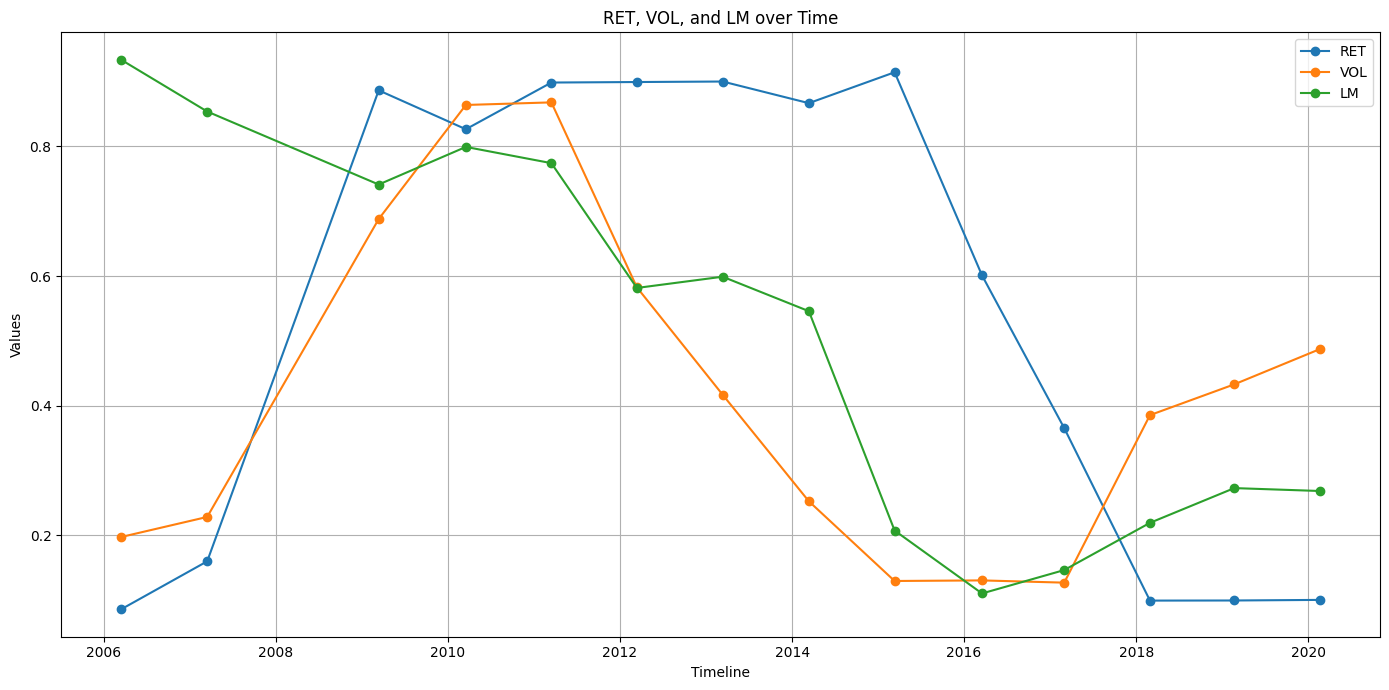

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Given data in CSV format
data = """
Date,ret,vol,lm
2006-03-16,0.08591776732824168,0.19740504415769522,0.9335864076603528
2007-03-16,0.15988557613847998,0.22833490292469505,0.8538129523032415
2009-03-13,0.8864897444918308,0.6879138802554384,0.7411669910990177
2010-03-18,0.8264672814393713,0.8639106081446466,0.7991901846421333
2011-03-16,0.8985170345775801,0.8679051935815628,0.7741482452976456
2012-03-13,0.8992989162476631,0.5825543158774061,0.5816064396692825
2013-03-12,0.9000824234515487,0.41692247554674194,0.5989437961806848
2014-03-13,0.8667054847159812,0.25248867613330234,0.5457728244367529
2015-03-12,0.9143597444225369,0.1295223743165433,0.20736509734212877
2016-03-17,0.6010424087115045,0.13042128998499156,0.11028642630115568
2017-03-01,0.36537795190204725,0.12696043725714132,0.1463633341056536
2018-02-28,0.09926595958124178,0.3854236122780752,0.21923534777297768
2019-02-21,0.09943828407186836,0.432902123639386,0.27282349556658936
2020-02-20,0.10034450139971525,0.4873911120813297,0.26834320600368095
"""

# Read the data into a pandas DataFrame
df = pd.read_csv(StringIO(data), parse_dates=['Date'])

# Set the date as the index
df.set_index('Date', inplace=True)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['ret'], label='RET', marker='o')
plt.plot(df.index, df['vol'], label='VOL', marker='o')
plt.plot(df.index, df['lm'], label='LM', marker='o')

# Formatting the plot
plt.xlabel('Timeline')
plt.ylabel('Values')
plt.title('RET, VOL, and LM over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
